In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('3.6 london.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


•	timestamp – дата и время (точность до часа)

•	cnt – количество аренд велосипедов за этот час

•	t1 – температура, в С

•	t2 – температура "ощущается как", в С

•	hum – влажность (%)

•	wind_speed – скорость ветра, км/ч

•	weather_code – погодные условия:

1 – ясно (SKC)

2 – преимущественно ясно / встречаются отдельные облака (SCT)

3 – облачно / значительные облака (BKN)

4 – пасмурно (OVC)

7 – небольшой дождь Rain/ light Rain shower/ Light rain

10 – дождь с грозой

26 – снегопад

94 – ледяной туман

•	isholiday – является ли день праздником (1 – праздник, 0 – нет)

•	isweekend –  является ли день выходным (1 – выходной, 0 – нет)

•	season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)


In [ ]:
#Проверим данные на наличие пропусков, а также на правильность типов данных
print(df.shape)
df.info()

(17414, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df['weather_code'] = df['weather_code'].astype('category')
df['is_holiday'] = df['is_holiday'].astype('category')
df['is_weekend'] = df['is_weekend'].astype('category')
df['season'] = df['season'].astype('category')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  category      
 7   is_holiday    17414 non-null  category      
 8   is_weekend    17414 non-null  category      
 9   season        17414 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(4), int64(1)
memory usage: 885.2 KB


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


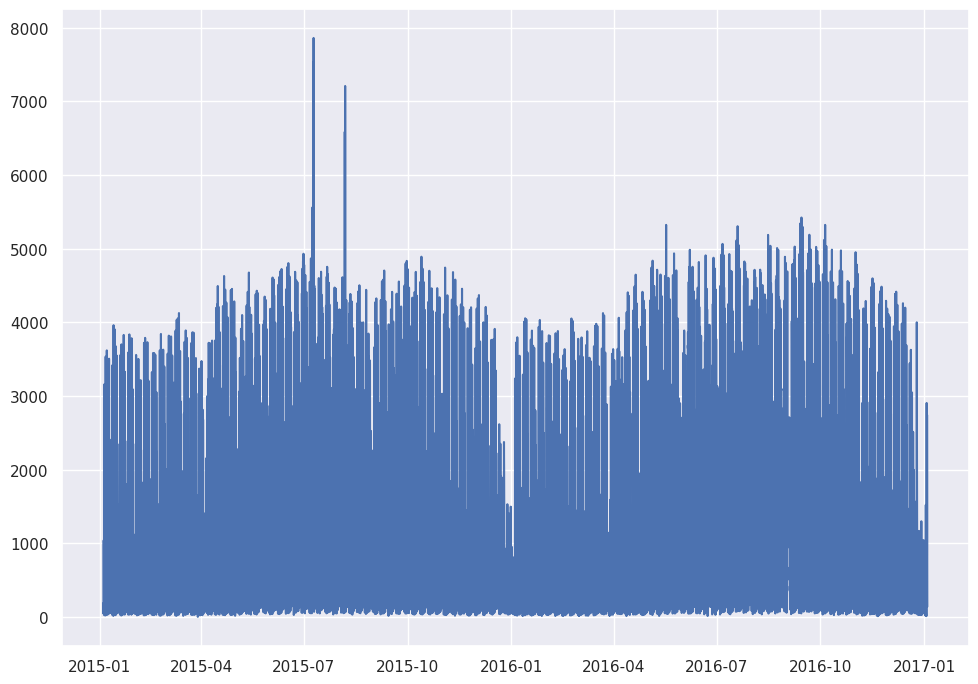

In [ ]:
#график по числу поездок по дате и времени.


df['timestamp'].drop_duplicates().shape #нет строк с пересечением по времени
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.plot(df['timestamp'], df['cnt'])

df.head(48)


In [ ]:
#аггрегируем данные по дням, чтобы график был более понятным
df_date = df.copy()
df_rs = df_date.resample('D', on='timestamp').agg({'cnt':'sum'})

     timestamp    cnt
0   2015-01-04   9234
1   2015-01-05  20372
2   2015-01-06  20613
3   2015-01-07  21064
4   2015-01-08  15601
..         ...    ...
726 2016-12-30  11566
727 2016-12-31  11424
728 2017-01-01   6421
729 2017-01-02  11823
730 2017-01-03  19436

[731 rows x 2 columns]


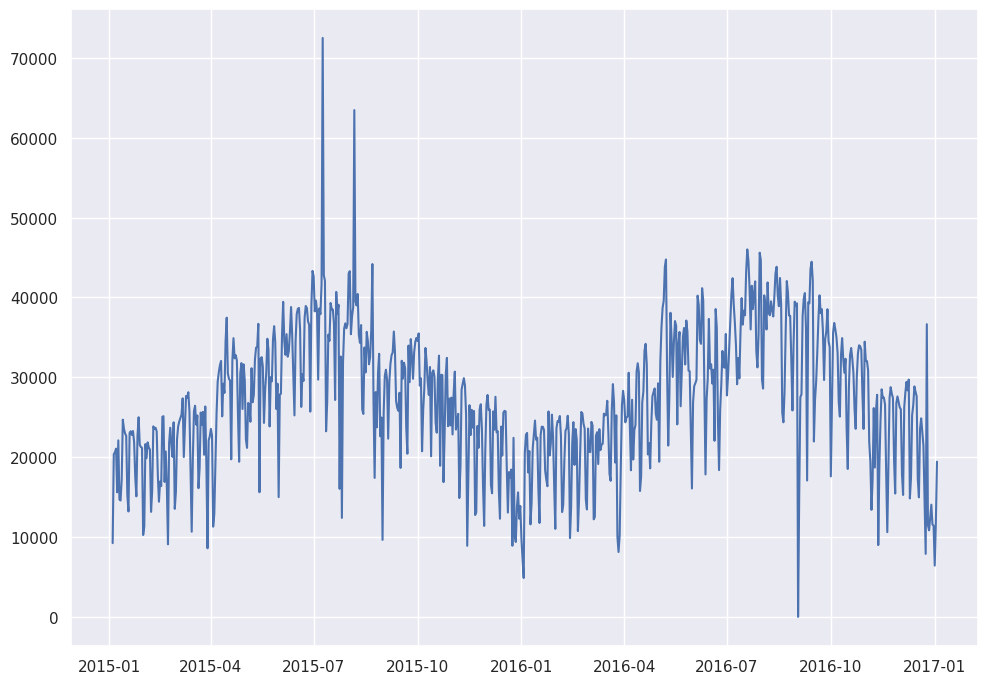

In [ ]:
df_rs.reset_index(inplace=True)
plt.plot(df_rs['timestamp'], df_rs['cnt'])

    timestamp           cnt
0  2015-01-04           NaN
1  2015-01-05           NaN
2  2015-01-06  16739.666667
3  2015-01-07  20683.000000
4  2015-01-08  19092.666667
..        ...           ...
69 2015-03-14  23977.333333
70 2015-03-15  18154.333333
71 2015-03-16  16195.666667
72 2015-03-17  18755.333333
73 2015-03-18  24014.333333

[74 rows x 2 columns]


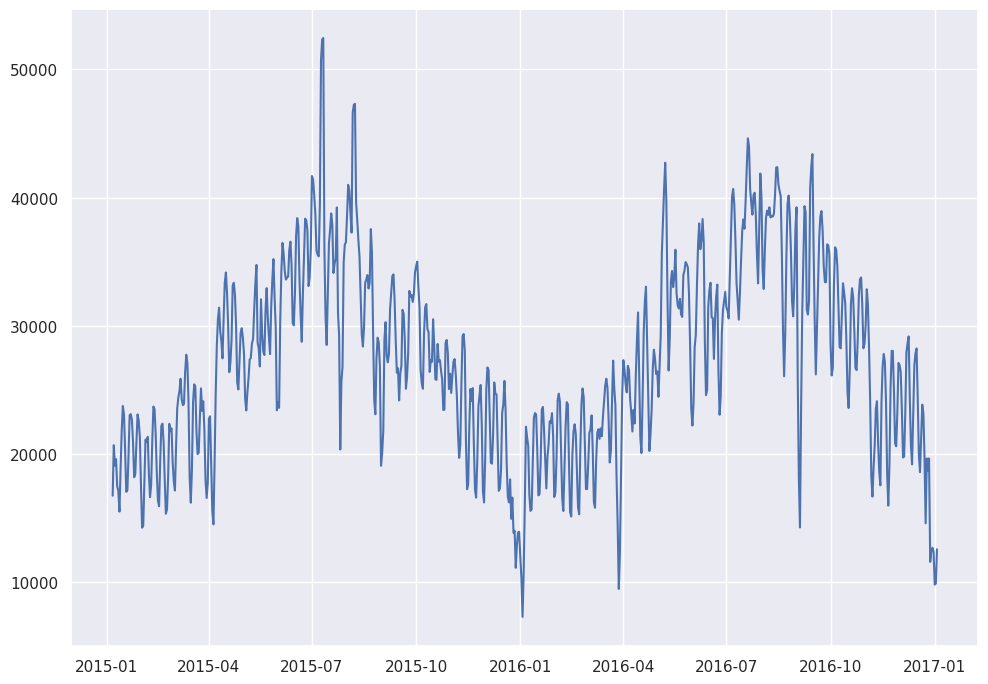

In [ ]:
#для большей читаемости применим скользящее окно за 3-е суток
df_rolling = df.resample('D', on = 'timestamp').agg({'cnt':'sum'}).rolling(3).agg({'cnt':'mean'}).reset_index() #берем среднее за 3 суток
plt.plot(df_rolling['timestamp'], df_rolling['cnt'])
print(df_rolling.head(74))

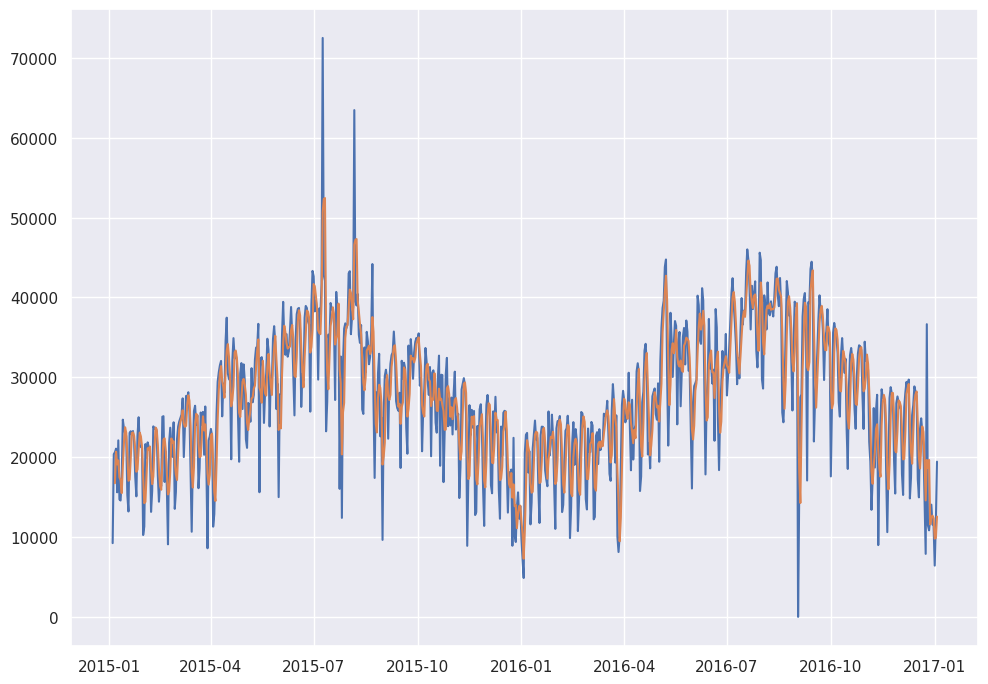

In [ ]:
#сравнение графика суммы по дням (синий) и среднего за 3-е суток (оранжевый)
plt.plot(df_rs['timestamp'], df_rs['cnt'])
plt.plot(df_rolling['timestamp'], df_rolling['cnt'])

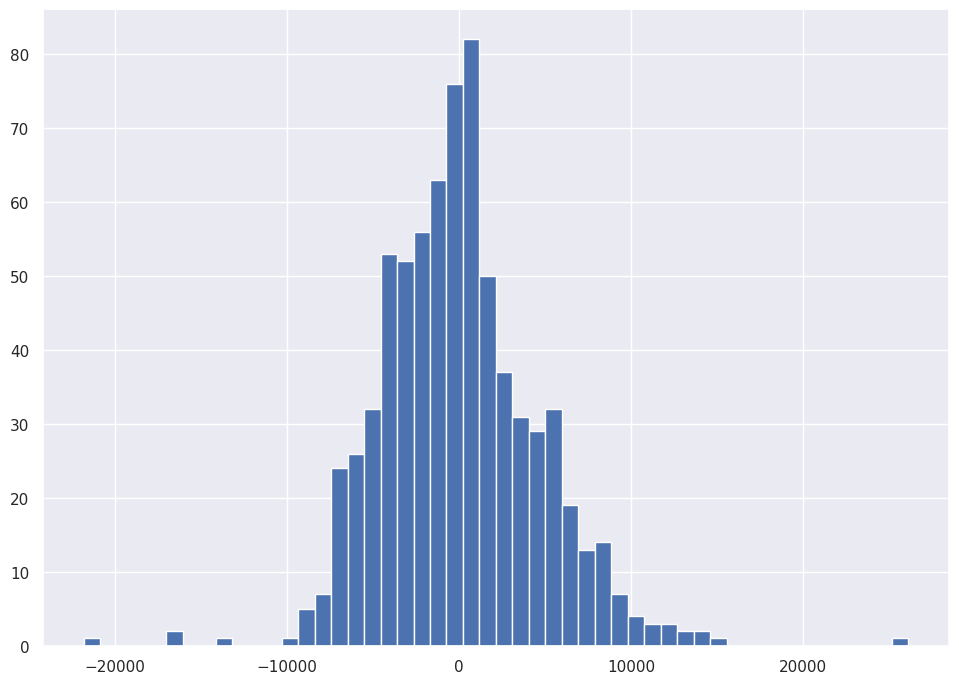

In [ ]:
#Попробуем найдем аномальные отличия от среднего за 3 дня, построим 99% дов интервал
std = np.std(df_rolling['cnt'] - df_rs['cnt'])
plt.hist(df_rolling['cnt'] - df_rs['cnt'], bins = 50)
df_rs['rolling'] = df_rolling['cnt']
df_rs['upper'] = df_rs['rolling'] + 2.581 * std
df_rs['lower'] = df_rs['rolling'] - 2.581 * std # cогласно t распределению для 99% интервала с df ~ 1000

In [ ]:
df_rs[(df_rs['cnt'] > df_rs['upper']) | (df_rs['cnt'] <  df_rs['lower'])]

,timestamp,cnt,rolling,upper,lower
130,2015-05-14,15609,28709.333333,40475.045454,16943.621213
186,2015-07-09,72504,50705.000000,62470.712121,38939.287879
189,2015-07-12,23240,36036.666667,47802.378787,24270.954546
201,2015-07-24,16034,31013.666667,42779.378787,19247.954546
214,2015-08-06,63468,46627.333333,58393.045454,34861.621213
232,2015-08-24,17400,29529.333333,41295.045454,17763.621213
314,2015-11-14,8898,21037.333333,32803.045454,9271.621213
607,2016-09-02,0,26086.333333,37852.045454,14320.621213
609,2016-09-04,27512,14259.000000,26024.712121,2493.287879
615,2016-09-10,17080,31262.000000,43027.712121,19496.287879


In [ ]:
#найдем причину 0 наблюдений, найдем причину высокого спроса за 	2016-12-25, 2015-07-09
#2016-12-25 - рождество -> аномально высокий спрос
# 2015-07-09	- забастовки в метро -> аномально высокий спрос
df[df['timestamp'] >= '2016-09-01'].head(48)
#видим прерывание данных: отсутствуют данные за 2016-09-01 23:00 - 2016-09-03 11:00:00, плохих новостей нет. Возможно, сервис не работал, возможно сбой в данных

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,rolling_cnt,diff_sq
14453,2016-09-01 00:00:00,322,18.0,18.0,68.0,15.0,1.0,0.0,0.0,2.0,1558.805556,1.529688e+06
14454,2016-09-01 01:00:00,186,17.0,17.0,73.0,16.0,1.0,0.0,0.0,2.0,1554.777778,1.873553e+06
14455,2016-09-01 02:00:00,89,16.5,16.5,75.0,16.0,1.0,0.0,0.0,2.0,1551.472222,2.138825e+06
14456,2016-09-01 03:00:00,56,16.0,16.0,74.5,11.0,2.0,0.0,0.0,2.0,1548.583333,2.227805e+06
14457,2016-09-01 04:00:00,64,16.0,16.0,77.0,12.0,2.0,0.0,0.0,2.0,1547.111111,2.199619e+06
14458,2016-09-01 05:00:00,133,15.0,15.0,82.0,11.0,2.0,0.0,0.0,2.0,1547.263889,2.000142e+06
14459,2016-09-01 06:00:00,811,15.0,15.0,82.0,12.0,2.0,0.0,0.0,2.0,1555.916667,5.549008e+05
14460,2016-09-01 07:00:00,2663,16.0,16.0,77.0,11.0,2.0,0.0,0.0,2.0,1588.930556,1.153625e+06
14461,2016-09-01 08:00:00,4631,16.5,16.5,75.0,9.0,2.0,0.0,0.0,2.0,1645.875000,8.910971e+06
14462,2016-09-01 09:00:00,2365,18.0,18.0,68.0,6.5,2.0,0.0,0.0,2.0,1666.555556,4.878246e+05
